### Seaborn - 고급 그래프
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버전

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seaborn에서 제공하는 titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [3]:
# 스타일(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

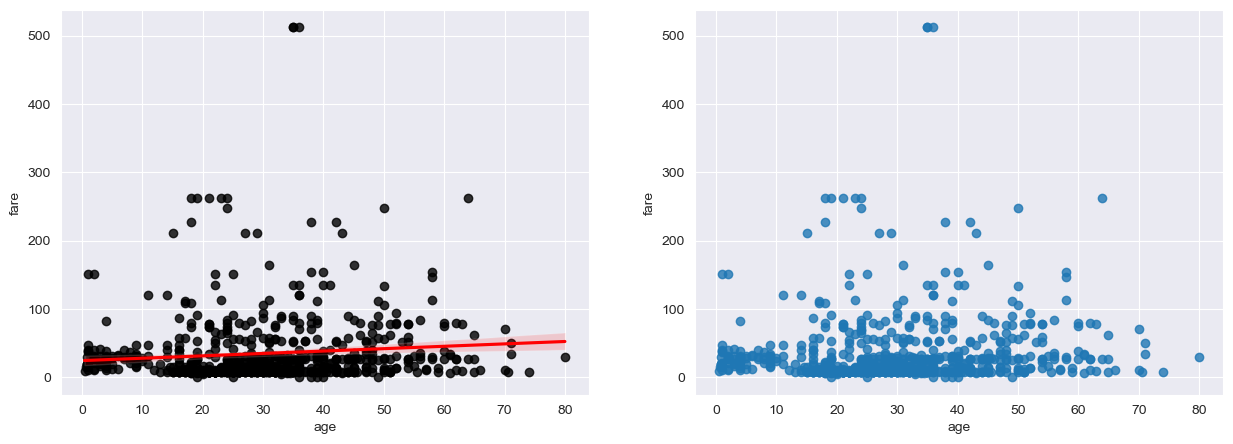

In [6]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선 표시
sns.regplot(
  x='age',
  y='fare',
  data=titanic,
  scatter_kws={'color':'black'}, # scatter color
  line_kws={"color" : "red"}, # regression line color
  ax=ax1
)

# 선형 회귀선 미표시
sns.regplot(
  x='age',
  y='fare',
  data=titanic,
  fit_reg=False,
  ax=ax2
)


plt.show()

---
### 히트맵(heatmap)
- 2개의 데이터를 x,y에 놓고 데이터를 매트릭스 형태로 분류
- 데이터는 연속형 데이터가 아닌 범주형 데이터로 작업

In [9]:
# 피벗테이블로 정리 (1,2,3등 객실의 성별 입실 숫자)
table = \
  titanic.pivot_table(
    index=['sex'],
    columns=['class'],
    aggfunc='size' # size : data값의 크기를 기준으로 집계 / 빈도수 구하기 
  )

table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


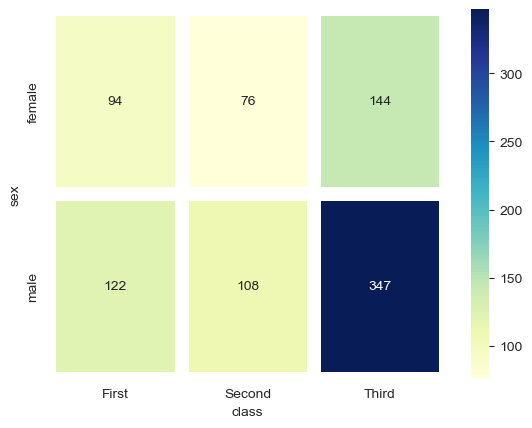

In [14]:
# 히트맵 그리기
sns.heatmap(
  table,
  cmap='YlGnBu',
  annot=True,
  fmt='d', # 정수형 포맷
  linewidths=10 # 구분선 
)

plt.show()

---
### 데이터의 산점도

In [15]:
sns.set_style('whitegrid')

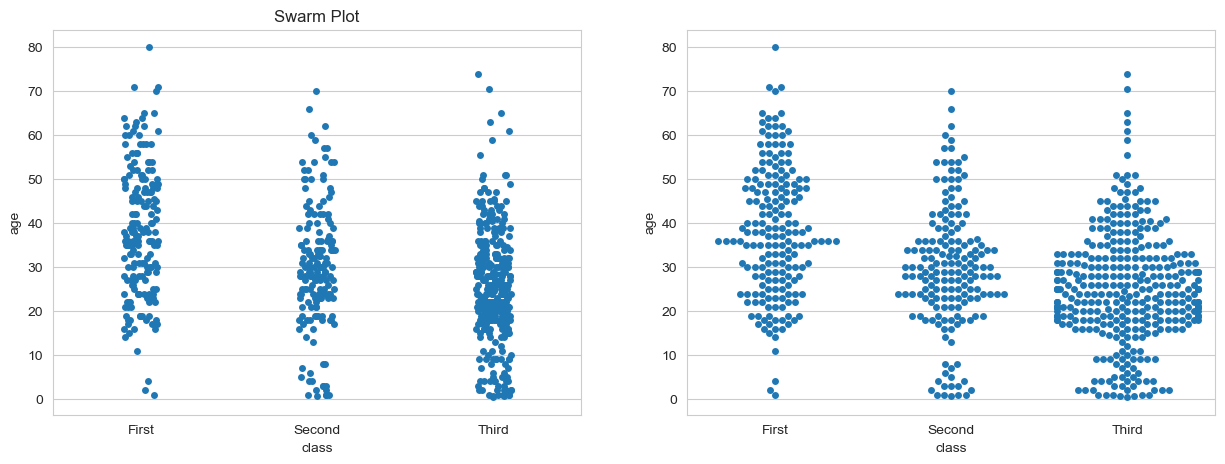

In [20]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
  x='class',
  y='age',
  data=titanic,
  ax=ax1
)
ax1.set_title('Strip Plot')

sns.swarmplot(
  x='class',
  y='age',
  data=titanic,
  ax=ax2
)
ax1.set_title('Swarm Plot')

plt.show()

---
### 막대 그래프

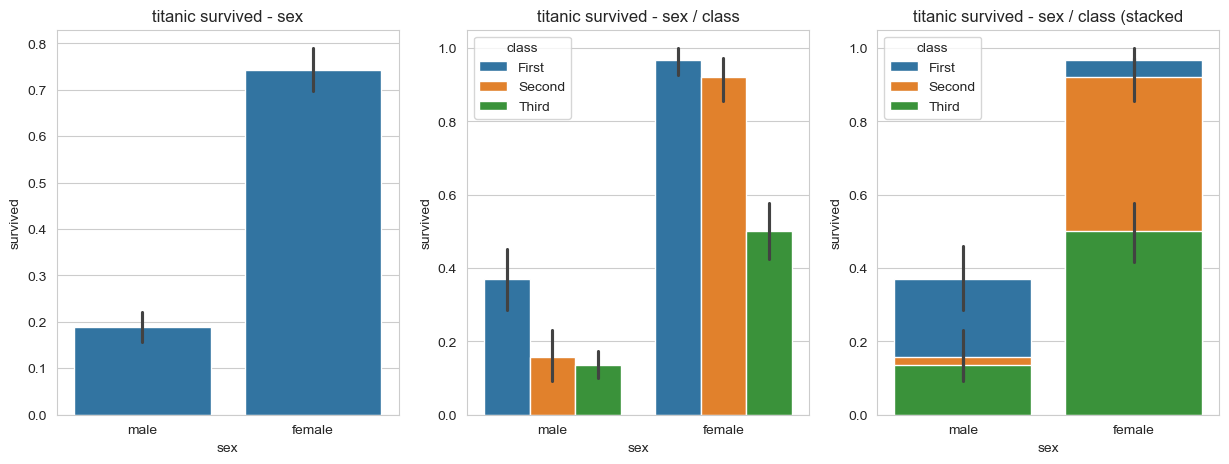

In [27]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
  x='sex',
  y='survived',
  data=titanic,
  ax=ax1,
  # ci='sd' # 오차막대에 신뢰구간이 아닌 표준편차 
)
ax1.set_title('titanic survived - sex')

# column을 추가 
sns.barplot(
  x='sex',
  y='survived',
  hue='class',
  data=titanic,
  ax=ax2
)
ax2.set_title('titanic survived - sex / class')


# column을 추가 , Stacked(중첩 그래프)
sns.barplot(
  x='sex',
  y='survived',
  hue='class',
  data=titanic,
  dodge=False,
  ax=ax3
)
ax3.set_title('titanic survived - sex / class (stacked')



plt.show()

오차막대(error bar)   
: 신뢰구간(95%의 범위) -> 분산에 대한 크기 

---
### 빈도 그래프

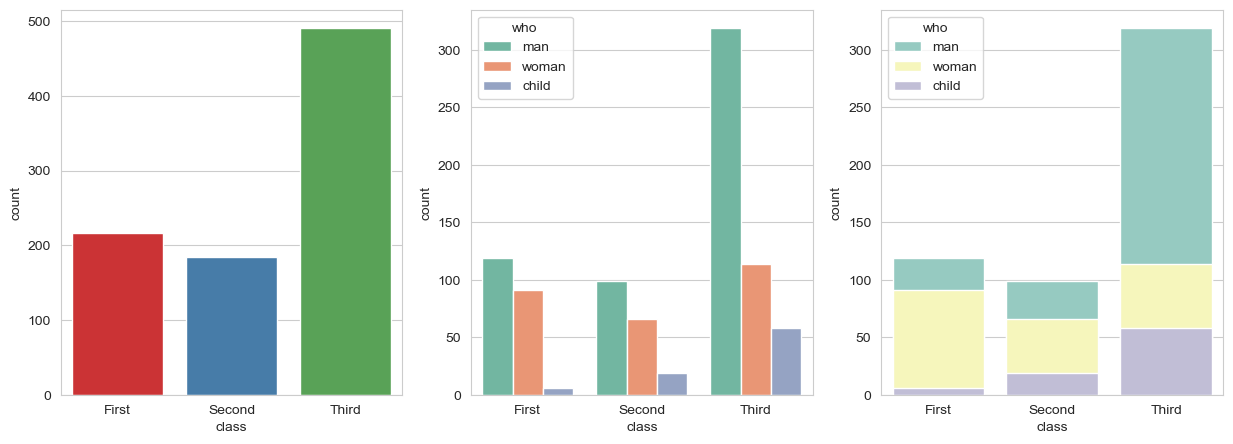

In [33]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Class에 크기
sns.countplot(
  x='class',
  data=titanic,
  palette="Set1",
  ax=ax1
)

# Column 추가
sns.countplot(
  x='class',
  hue='who',
  data=titanic,
  palette="Set2",
  ax=ax2
)

# 누적 그래프
sns.countplot(
  x='class',
  hue='who',
  data=titanic,
  dodge=False,
  palette="Set3",
  ax=ax3
)


plt.show()

---
### 박스플롯 / 바이올린 그래프 
- 박스플롯은 범주형 데이터의 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다. 

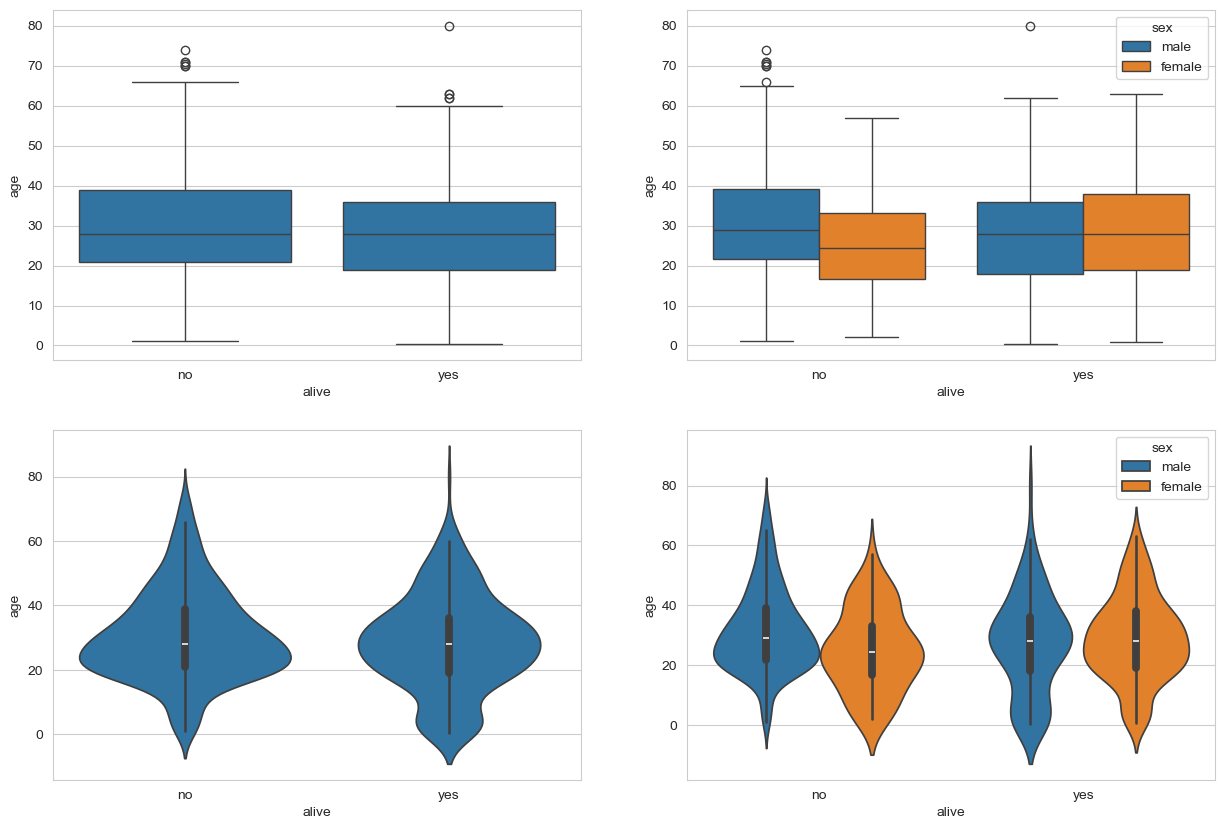

In [39]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스그래프 - 기본값
sns.boxplot(
  x='alive',
  y='age',
  data=titanic,
  ax=ax1
)

# 성별 추가
sns.boxplot(
  x='alive',
  y='age',
  hue='sex',
  data=titanic,
  ax=ax2
)

# 바이올린 그래프
sns.violinplot(
  x='alive',
  y='age',
  data=titanic,
  ax=ax3
)

sns.violinplot(
  x='alive',
  y='age',
  hue='sex',
  data=titanic,
  ax=ax4
)


plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공 

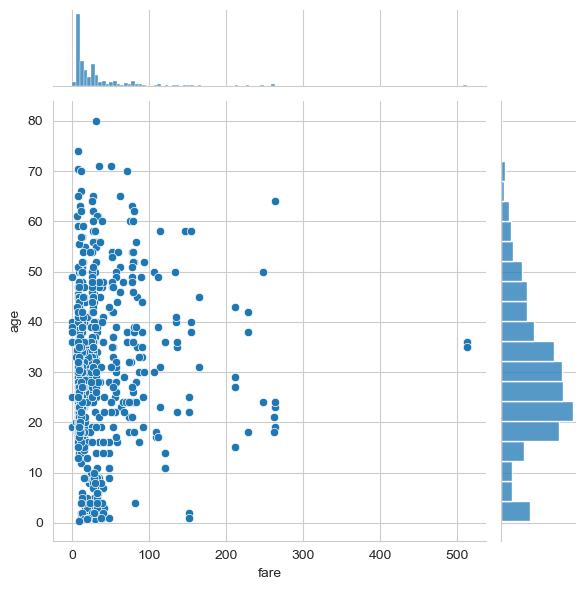

In [41]:
# 조인트 그래프 - 산점도(기본값)
sns.jointplot(
  x='fare',
  y='age',
  data=titanic
)

plt.show()

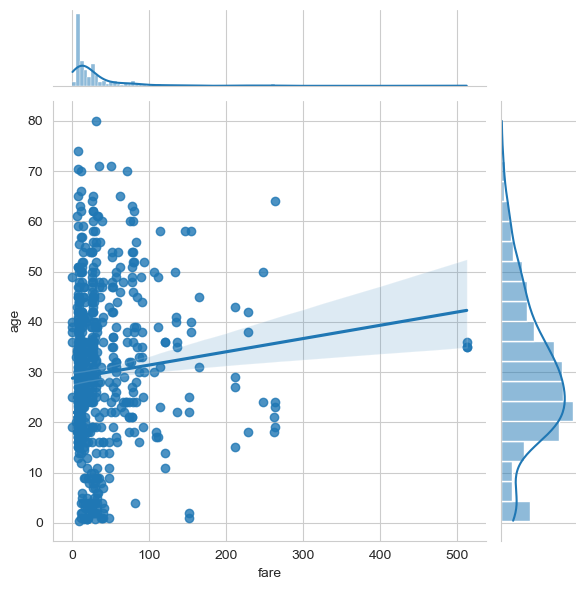

In [43]:
# 조인트 그래프 - 회귀선
sns.jointplot(
  x='fare',
  y='age',
  kind='reg',
  data=titanic
)

plt.show()

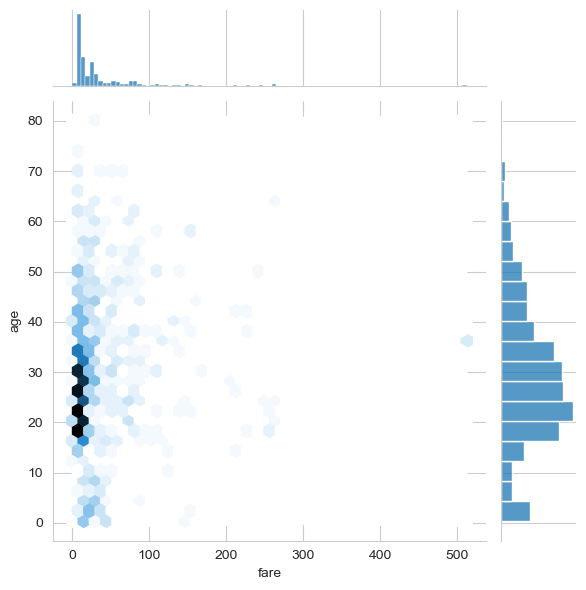

In [44]:
# 조인트 그래프 - 육각그래프
sns.jointplot(
  x='fare',
  y='age',
  kind='hex',
  data=titanic
)

plt.show()

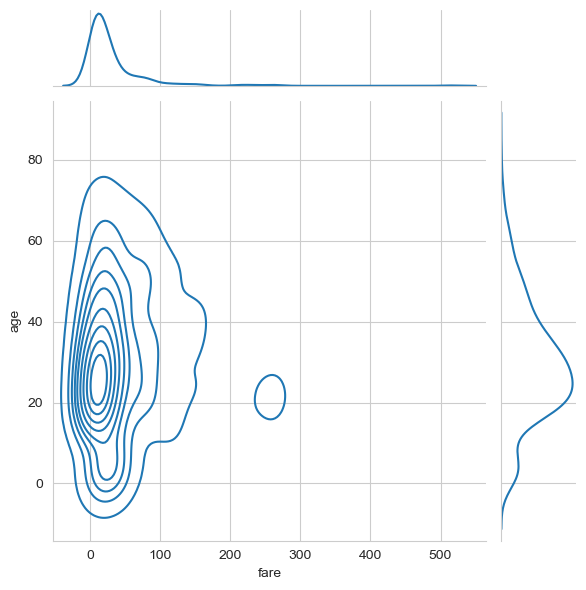

In [45]:
# 조인트 그래프 - 커널 밀집 그래프
sns.jointplot(
  x='fare',
  y='age',
  kind='kde',
  data=titanic
)

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

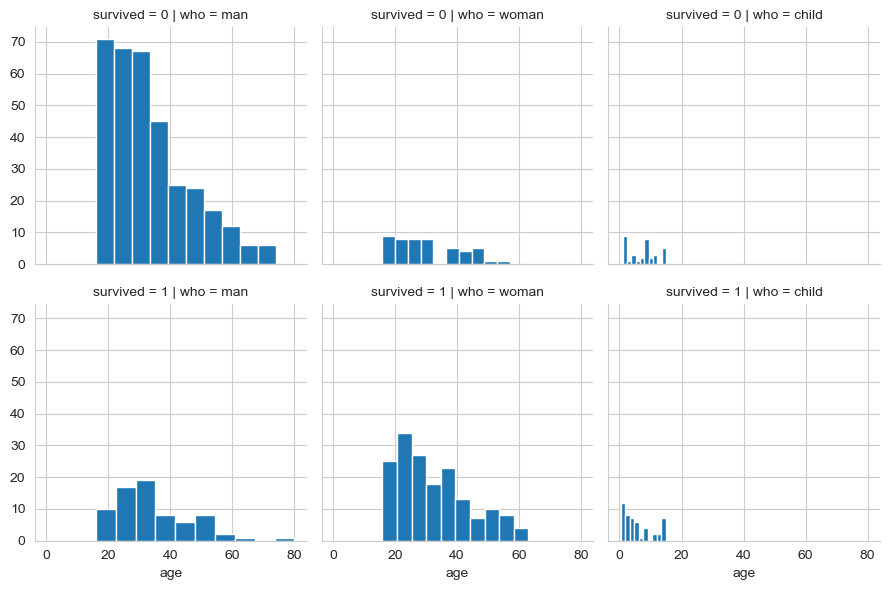

In [47]:
# 조건에 따라 그리드 나누기
g = sns.FacetGrid(
  data=titanic,
  col='who',
  row='survived'
)

g = g.map(plt.hist, 'age')